# Magnetization of Ising model on infinite random regular graph
Use the `RegularFactorGraph` type to run Belief Propagation on an infinite random graph of fixed degree $k$

In [2]:
using BeliefPropagation, BeliefPropagation.Models

In [4]:
k = 3
g = RegularFactorGraph(2, k);

In [13]:
maxiter = 500
Js = LinRange(0.2, 1, 100)
ms = map(Js) do J
    ψ = [IsingCoupling(J)]
    bp = fast_ising_bp(g, ψ)
    bp.h .= rand.()
    iters = iterate!(bp; maxiter, tol=1e-8, damp=0.2)
    m = tanh(only(bp.b))
end;

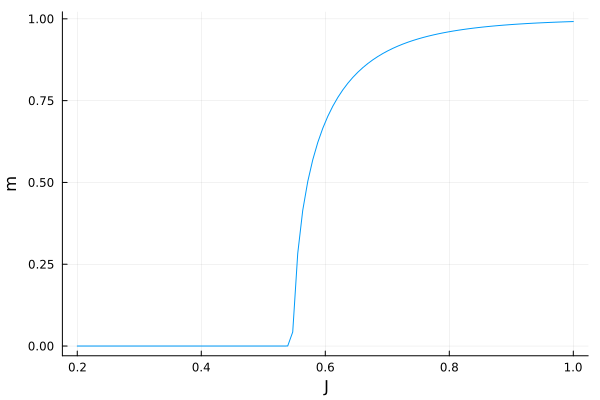

In [14]:
using Plots
plot(Js, ms, xlabel="J", ylabel="m", label="")